Welcome!  This notebook is a Data Science/Machine Learning Project



# Table of Contents

1. [Frame the problem and look at the big picture.](#frame)
2. [Get the data.](#collection)
3. [Explore the data to gain insights.](#eda)
4. [Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.](#prep)
5. [Explore many different models and short-list the best ones.](#models)
6. [Fine-tune your models and combine them into a great solution.](#tuning)
7. [Present your solution.](#solution)
8. [Launch, monitor, and maintain your system.](#system)

# Framing the Problem and Looking at the Big Picture
<a id="frame"></a>

The objective of this project is to build a model of median rental rates in California using city
data from Towncharts.com which provides information that is collated from a large variety of government agencies and public data sources.
<br>
Hypothetically, this model would be created to benefit and serve a particular purpose in a company.
Which in turn would determine the specifications and approach in your project

In this project our superviser Adam Smith has told us that our model's output will be fed to another Machine Learning system along with many other signals. This downstream system will provide current property owners with insights towards determining their rental amount. Getting this right is critical, you want to ensure that the price is low enough to attract applicants, while high enough to cover costs. Pricing units lower may result in problematic tenants, but higher prices can lead to longer vacancies.

What are the current solutions/workarounds: Mr.Smith says that currently the estimates of median rental rates are outsourced. This is costly and their estimates are off by more than 200 dollars. 
That is why the company has chosen to investigate if an in house estimate based on publicly available data can come as close or improve upon the outsourced estimates.


My project is a typical supervised learning task given the fact that the
training examples are labeled (each instance comes with the expected output i.e, the cities median rental rate).
Moreover, we are asked to predict the value of $Y$ (median rental rate) using $X_{1}...X_{m}$ where **m** = *number of features*. This task is a a typical regression task in particualr a multiple regression problem. Additionally, seeing as there is no continous flow of data coming in the ML system, we need not adjust to changing data rapidly, and the data is small enough to fit in memory,so plain batch learning should do just fine.


We need a performance measure of our ML system. We have chosen in this case to select the Root Mean Square Error(RMSE).This performance measure will be aligned with the business objective as it will give an idea of how much error the system typically makes in its predictions. Our minimum performance needed to reach the business objective would be a RMSE of less than or equal to 200
.$RMSE(X,h) = \sqrt{ \frac 1m \sum\limits_{i=1}^m ( h(x^i) - y ^i )^2 }$

In the case that our data has many outlier cities we may consider using the Mean Absolute Error
> $MAE(X,h) = \frac 1m \sum\limits_{i=1}^m \mid h(x^i) - y ^i\mid$

After framing the problem and looking at the big picture its good practice for me to  to list and verify the assumptions that were 
made so far (by me and others). This will help avoid a difference in expectations and help verify that the characteristics of my system output correspond to the expected signal that the downstream system expects. 

# Data Collection 
<a id="collection"></a>

Collection of data was gathered via webscraping from Towncharts.com the website provides information and data about every geographic location in the United States including city, county, zip code, state and more. Additional variables latitude and longitude for the cities were merged from a kaggle dataset Collection of data was gathered via webscraping from Towncharts.com the website provides information and data about every geographic location in the United States including city, county, zip code, state and more. Additional variables latitude and longitude for the cities were merged from a [kaggle dataset](https://www.kaggle.com/camnugent/california-housing-feature-engineering#cal_cities_lat_long.csv). Typically I would be asked and it would be good practice to import the csv file into a table using the companies chosen database. This provides the opportunity for collaboration as all a coworker would need to access the data would be to get their credentials and access authorizations. 

For more information about how string methods, pandas, beautiful soup and more were used to produce the Towncharts_California_Housing.csv the following link outlines the process
> https://github.com/clazaro97chosen/American-Community-Survey-Project/blob/master/Scrape_the_Data.ipynb 

Checking the legal obligations from 
the user aggreement on Towncharts.com use of this data is allowed and encouraged.

**Download the Data**

Best practice calls for me to use a python file which i have created for fetching the data and writing a function to load the data.

### Setup

In [1]:

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(22)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from mpl_toolkits.basemap import Basemap

ImportError: DLL load failed: The specified module could not be found.

In [68]:
def load_housing_data(housing_path):
    csv_path = os.path.join(housing_path,'datasets','california_housing.csv')
    return pd.read_csv(csv_path,index_col=0)   

In [69]:
housing = load_housing_data('C:\\Users\\Crist\\Towncharts_Project\\California_Housing_Project\\')


In [70]:
housing = housing.rename(columns = {'percent_of_rent_to_total':'rent_home_percent'})

### Quick Description of the Data

### Data dictionary: provided by Towncharts.com 37 original variables collected

* housing_units:Total number of housing units in the area
* housing_density : The number of housing units per square mile in the area
* change_hunits: Change in housing units from 2010 to 2017
* rent_home_percent: The percent of all occupied housing units that are rental housing units (%)
* owned_homes: The percent of all occupied housing units that are owned housing units (%)
* med_homeval: Median home value i.e how much property is worth( house and lot, mobile homes and lot, or condominium unit) if it was for sale \\$

* med_rental_rate: the median monthly rental amount for a rental unit in this area \\$

* med_owner_cost: The monthly cost of housing for property owners including mortgage payment, taxes, insurance,and utilities.\\$

* med_own_cost_aspercentof_income: The monthly owner cost as a percent of the household income. This measure is an excellent way to understand how affordable housing is for owners in an area (%)
* med_hval_aspercentof_medearn: How much the property is worth(house and lot, mobile home and lot, or condominium unit) if it was for sale as a percent of the median earnings for a worker in the area (%)
* med_hcost_ownmortg: Median housing cost for homeowners with a mortgage(including the cost of the mortgage or other debt) \\$
* med_hcost_own_wo_mortg: Median housing cost for homeowners who do not have a mortgage. This isolates the cost of ownership seperate from the financing cost of debt \\$
* hcost_aspercentof_hincome_ownmortg: Homeowners with a mortgage showing total cost (including mortgage debt) as a percent of household income (%)
* hcost_as_perc_of_hincome_womortg: Homeowners without a mortgage showing total cost as a percent of household income.
*med_real_estate_taxes: The median real estate taxes paid by owners of homes in the area \\$
* family_members_per_hunit: The average size of related families members who live together in a housing unit. 
* median_num_ofrooms: The average number of rooms of total rooms for housing units in the area
* median_year_house_built: The average year the housing units were built in the area. This indicates the average age of housing units in the area.
* household_size_of_howners: For people who own their homes how many people on average are living in them whether they are part of family or related or not. 
* household_size_for_renters: The average size of a household for people who are renting.
* med_year_moved_in_for_owners: The median year that a home owner moved into their home
* med_year_renter_moved_in: The median year that a renter moved into their home 
* The following varialbes are monthly rental rates by size of  Rental in Bedrooms as a percentage:
studio_1000_1499,studio_1500_more,
studio_750_999,
onebed_1000_1499,
onebed_1500_more,
onebed_750_999,
twobed_1000_1499,
twobed_1500_more,
twobed_750_999,
threebed_1000_1499,
threebed_1500_more,
threebed_750_999

* city: Name of city

* Latitude: Latitude of the city

* Longitude: Longitude of the city

* Population: Population of the city

Checking out the Dataframe

In [71]:
display(housing.head())
display(housing.info())

,housing_units,housing_density,change_hunits,rent_home_percent,owned_homes,med_homeval,med_rental_rate,med_owner_cost,med_own_cost_aspercentof_income,med_hval_aspercentof_medearn,...,twobed_1500_more,twobed_750_999,threebed_1000_1499,threebed_1500_more,threebed_750_999,city,Latitude,Longitude,population,area_total_km2
0,8751.00000,156.20000,-3.70000,50.70000,49.30000,151600.00000,1059.00000,1093.00000,24.00000,427.00000,...,0.03200,0.50800,0.58300,0.13700,0.18100,Adelanto,34.58277,-117.40921,32867.00000,145.10700
1,7674.00000,984.70000,1.20000,25.60000,74.40000,745000.00000,2261.00000,2488.00000,23.00000,928.00000,...,0.89900,0.03800,0.00000,0.96200,0.00000,AgouraHills,34.15334,-118.76167,20736.00000,20.26000
2,32414.00000,3104.10000,0.20000,53.00000,47.00000,729100.00000,1607.00000,2259.00000,21.00000,1006.00000,...,0.63300,0.01900,0.11900,0.66700,0.03600,Alameda,37.76521,-122.24164,78246.00000,59.46500
3,7724.00000,4319.40000,-2.10000,52.40000,47.60000,766000.00000,1739.00000,2501.00000,21.00000,991.00000,...,0.82100,0.01200,0.08400,0.84900,0.00000,Albany,37.88687,-122.29775,19682.00000,14.15500
4,30990.00000,4061.10000,0.20000,59.70000,40.30000,553800.00000,1286.00000,1629.00000,22.00000,1296.00000,...,0.31200,0.05400,0.18000,0.62900,0.03900,Alhambra,34.09529,-118.12701,85168.00000,19.76600


<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 451
Data columns (total 39 columns):
housing_units                         452 non-null float64
housing_density                       452 non-null float64
change_hunits                         450 non-null float64
rent_home_percent                     452 non-null float64
owned_homes                           452 non-null float64
med_homeval                           452 non-null float64
med_rental_rate                       451 non-null float64
med_owner_cost                        449 non-null float64
med_own_cost_aspercentof_income       452 non-null float64
med_hval_aspercentof_medearn          452 non-null float64
med_hcost_ownmortg                    451 non-null float64
med_hcost_own_wo_mortg                450 non-null float64
hcost_aspercentof_hincome_ownmortg    451 non-null float64
hcost_as_perc_of_hincome_womortg      452 non-null float64
med_real_estate_taxes                 452 non-null float64
family_mem

None

In [72]:
count = 0
for col in housing.columns:
    print(housing[col].name,"has a count of missing values =",housing[col].isna().sum())
    

housing_units has a count of missing values = 0
housing_density has a count of missing values = 0
change_hunits has a count of missing values = 2
rent_home_percent has a count of missing values = 0
owned_homes has a count of missing values = 0
med_homeval has a count of missing values = 0
med_rental_rate has a count of missing values = 1
med_owner_cost has a count of missing values = 3
med_own_cost_aspercentof_income has a count of missing values = 0
med_hval_aspercentof_medearn has a count of missing values = 0
med_hcost_ownmortg has a count of missing values = 1
med_hcost_own_wo_mortg has a count of missing values = 2
hcost_aspercentof_hincome_ownmortg has a count of missing values = 1
hcost_as_perc_of_hincome_womortg has a count of missing values = 0
med_real_estate_taxes has a count of missing values = 0
family_members_per_hunit has a count of missing values = 0
median_num_ofrooms has a count of missing values = 0
median_year_house_built has a count of missing values = 0
household_

Each row represents a city in california we have a total collection of 452 cities/instances in the dataset. **Some attributes contain null values**.  In our case this means the variable was not in the text section of the housing information provided by Towncharts.com. Although the data set is fairly small by Machine Learning standards this data set is great as a first step in predicting median rental rates in california. Understandbly I will need to decide which method to use to treat these missing values later.

It is important to note that all attributes are numerical. No dummy variables need to be created for an ordinal character variable. If there was a categorical attribute with a large number of possible categories it is recommended to avoid the computational complexity by replaacing each category with a learnable low dimensional vector  called an embedding. For future research perhaps some character variables should be considered after seeking domain expertise about valuable character variables to consider in the prediction of median rental price. 

In [73]:
pd.options.display.float_format = '{:.5f}'.format
#pd.reset_option('^display.', silent=True)

Summary of each numerical attribute

In [74]:
housing.housing_units.describe()

count       452.00000
mean      24963.13274
std       79012.58597
min          37.00000
25%        4385.75000
50%       11841.00000
75%       26010.25000
max     1457762.00000
Name: housing_units, dtype: float64

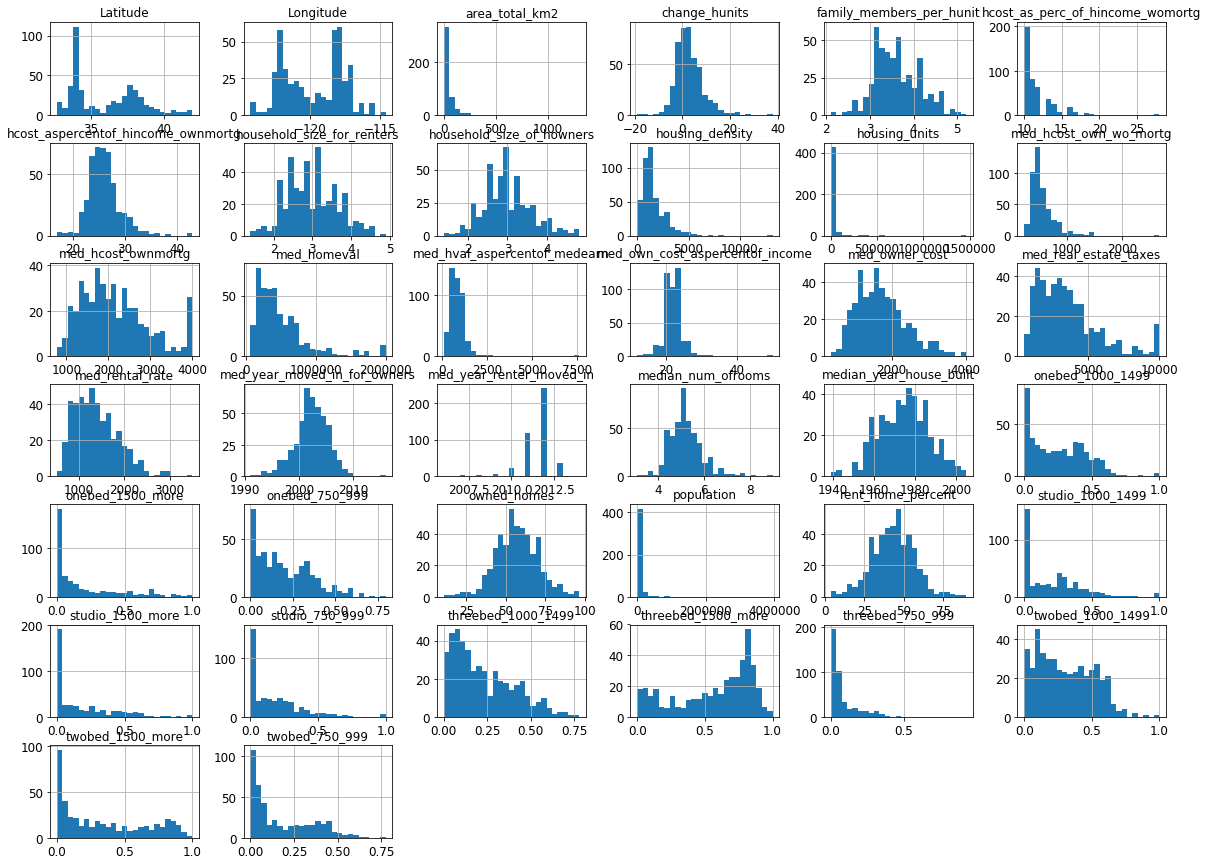

In [75]:
housing.hist(bins=25,figsize=(20,15))
plt.show()

 ### A few takeaways:
* **Attributes have different scales** some are in percentage, some are in units, and some are in dollars.
<br><br>
* **Many histograms are right tail heavy**: Meaning their mean is greater than their median i.e the mean is being 'pulled' by outliers.
<br><br>
* Interestingly  housing units (mean: 24963, std:79012, median:11841) and  change in housing units from 2010 to 2017 (mean:3, std 5.9, median:2.1) are two attributes whose standard deviation are considerably greater than their mean looking at the IQR for both the range of the middle half in change of housing units is Q3(5.6) to Q1(-.875%) = 6.475 and the range of the middle half of housing units is Q3(26010.25) to Q1(4385.75) = 21624.5
<br><br>
* Two attributes median housing cost for homeowners with a  mortgage (including the cost of the mortgage or other debt) and median real estate taxes paid by onwers of homes in the area have a noticable number of high values at the tail end (spike) of their distribution of values. <br><br>
* The mean percent of all occupied housing units that are owned housing units across the cities is greater than the mean of all occupied housing units that are rental housing units mean of 57% vs mean of 42% both have a fairly normal distribution <br><br>
* A variable that provides insight how much the property is worth(house and lot, mobile home and lot, or condominium unit) if it was for sale as a percent of the median earnings for a worker in the area this attribute has a mean of 861 standard deviation of 473, and a median of 837. It is a slightly right skewed distribution.

### Creating a test set

Best practice advises me to create a unique test set and avoid generating a different test as over time the Machine Learning algorithms will get to see the whole dataset. There are some important considerations when creating a test set. And they depend on whether I will be fetching an updated dataset on occassion or if I would be working on just one dataset. The latter has a simple solution of setting the random number generator seed in ***train_test_split()***, so that it always generates the same shuffled indices for extracting the instances to include in my test set. While the former involves using each instance's identifier to decide whether or not it should go in the test set (assuming instances have a unique and immutable identifer). This eliminates the possibility of leakage of instances previously in the training set into the new test set. However stratisfied sampling might be preffered over random sampling in the occasion that you want to ensure that the test set is representative of some attribute in your data set.

I choose to implement stratisfied random sampling
based on med_owner_cost (the median monthly cost of housing for property owners). A continous numerical attribute created into a category. My belief is that this is a vital attribute in predicting median rental prices. For example, if my test set contained a grand majority of instances in which med_owner_cost was between the 3rd Quantile and the max of med_owner_cost, than no matter what machine learning pipeline I implemented my test error would always be large. 

Note that one instance had a missing a label value this value will be deleted. And med_owner_cost has three missing values which will be excluded sadly.
Further treatment of missing values will be dealt with shortly.

In [76]:
housing = housing[(pd.notnull(housing['med_rental_rate'])) & (pd.notnull(housing['med_owner_cost']))]
housing = housing.reset_index(drop=True)

Creation of owner cost category

In [77]:
housing['owner_cost_cat'] = pd.cut(housing['med_owner_cost'],
                                  bins = [0,750,1500,2250,3000,np.inf],
                                  labels = [1,2,3,4,5])

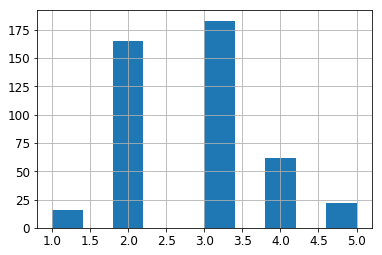

In [78]:
housing['owner_cost_cat'].hist()

Stratified sampling based on owner cost category

In [79]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=22)
for train_index,test_index in split.split(housing,housing['owner_cost_cat']):
    strat_train_set  = housing.reindex(train_index)
    strat_test_set = housing.reindex(test_index)

In [80]:
print("Owner cost category proportions in the overall dataset:\n{}".format(housing['owner_cost_cat'].value_counts()/len(housing)))           
print("Owner cost category proportions in the test set:\n{}".format(strat_test_set['owner_cost_cat'].value_counts()/ len(strat_test_set)))

Owner cost category proportions in the overall dataset:
3   0.40848
2   0.36830
4   0.13839
5   0.04911
1   0.03571
Name: owner_cost_cat, dtype: float64
Owner cost category proportions in the test set:
3   0.41111
2   0.36667
4   0.14444
5   0.04444
1   0.03333
Name: owner_cost_cat, dtype: float64


In [84]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("owner_cost_cat", axis=1, inplace=True)

# Explore the data to gain insights

In [85]:
housing = strat_train_set.copy()

In [86]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 194 to 355
Data columns (total 39 columns):
housing_units                         358 non-null float64
housing_density                       358 non-null float64
change_hunits                         357 non-null float64
rent_home_percent                     358 non-null float64
owned_homes                           358 non-null float64
med_homeval                           358 non-null float64
med_rental_rate                       358 non-null float64
med_owner_cost                        358 non-null float64
med_own_cost_aspercentof_income       358 non-null float64
med_hval_aspercentof_medearn          358 non-null float64
med_hcost_ownmortg                    357 non-null float64
med_hcost_own_wo_mortg                357 non-null float64
hcost_aspercentof_hincome_ownmortg    357 non-null float64
hcost_as_perc_of_hincome_womortg      358 non-null float64
med_real_estate_taxes                 358 non-null float64
family_m

In [89]:

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
#
m.scatter(housing['Longitude'].values,housing['Latitude'].values,latlon = True,
           c = housing['med_rental_rate'].values,cmap ='viridis',
           s=housing['area_total_km2'].values,linewidth=0,alpha=0.5)

plt.colorbar(label='Median Rental Rate $')
plt.clim(508,3501)

for a in [100,300,500]:
    plt.scatter([],[],c='k',alpha=.3,s=a,label=str(a) +'km$^2$')
plt.legend(scatterpoints=1,frameon=False,labelspacing=1,title= 'City Area')





NameError: name 'Basemap' is not defined

<Figure size 576x576 with 0 Axes>

"Towncharts.com - United States Demographics Data." United States Demographics data. N.p., 15 Dec. 2016. Web. 04 Sep. 2019. <http://www.towncharts.com/>.